In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pygrgl

import sys
sys.path.append('/Users/adityasyam/grg_pheno_sim') 

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals, normalize_genetic_values
from grg_pheno_sim.model import grg_causal_mutation_model

from test_phenotype_sim.effect_size_test import test_additive_effect_sizes


The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct --no-maf-flip -p 10 -t 2 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory


In [4]:
num = grg_1.num_samples
print("The number of sample nodes in this grg is " + str(num))
num_nodes = grg_1.num_nodes
print("The number of nodes in this grg is " + str(num_nodes))
num_mutations = grg_1.num_mutations
print("The number of mutations in this grg is " + str(num_mutations))

The number of sample nodes in this grg is 400
The number of nodes in this grg is 11373
The number of mutations in this grg is 10893


In [5]:
rng = np.random.default_rng()

mean_1 = 0.0  
var_1 = 1.0  
model_normal = grg_causal_mutation_model("normal", mean=mean_1, var=var_1)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_normal.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [-1.02517542e+00 -5.14769798e-01 -7.21833108e-01 -1.84818987e-01
  2.66850374e-01  1.14369813e+00  5.11054382e-01  2.01058403e-01
  3.21417661e-01 -9.63259212e-01 -7.74117906e-02  3.76357117e-01
 -8.90223772e-01  1.20172043e-01  2.62078235e-01  1.19461771e+00
 -1.70707099e+00 -1.28456675e+00 -7.57560921e-01 -1.91671538e-01
 -4.08513361e-01 -1.69734373e-01  1.87098473e-01 -1.38749947e-01
 -9.99882387e-01  2.61109534e-02  1.19407606e+00 -4.13103667e-01
  3.14398686e-01  1.15412752e-01 -5.19008803e-01 -1.87399165e-01
  6.51411096e-01  6.36413109e-01  2.40401552e-01  1.20214942e+00
  4.30023176e-01 -1.51564632e+00  6.00880306e-01  1.93214630e+00
  1.96758841e-01 -7.61436442e-01  5.24535256e-02  1.63688525e+00
  2.08936596e-01 -3.70743435e-01  1.30951698e+00  1.05368116e-01
 -5.66717187e-01 -1.40741001e+00 -6.85895765e-01  5.38616610e-01
 -7.51057473e-01 -1.65591426e+00  1.30804043e+00 -7.52594444e-01
 -6.77376757e-01 -5.48229648e-01  3.41296344e-02 -4.05835540e-01
 

In [6]:

trait_df_normal = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_normal, random_seed=1)

trait_df_normal #this is the pandas data frame showing the results using the normal distribution

,mutation_id,effect_size,causal_mutation_id
0,20,-1.810258,0
1,28,1.151768,0
2,62,1.681257,0
3,76,2.346698,0
4,119,-0.286668,0
...,...,...,...
995,10862,-0.221163,0
996,10874,-1.136983,0
997,10879,-0.966133,0
998,10883,-1.402602,0


In [7]:
sample_nodes_df = additive_effect_sizes(grg_1, trait_df_normal)


In [8]:
sample_nodes_df #the pandas dataframe containing only the sample nodes and their associated genetic values, 400 sample nodes expected

,sample_node_id,genetic_value,causal_mutation_id
0,0,-4.863310,0
1,1,-11.638354,0
2,2,-6.301743,0
3,3,3.847395,0
4,4,-4.820758,0
...,...,...,...
395,395,-8.190154,0
396,396,3.420223,0
397,397,-4.084002,0
398,398,-11.381398,0


In [9]:
ground_truth_genetic_value = test_additive_effect_sizes(grg_1, trait_df_normal) #this uses a recursive hard-coded method that finds each sample nodes ancestors to ensure correct effect sizes are passed down
ground_truth_genetic_value

[-4.863310045461928,
 -11.638353566173764,
 -6.301743429441365,
 3.8473953889809627,
 -4.82075773305127,
 -12.483045444740895,
 3.958297339029588,
 2.6829161841058453,
 -6.593299996740652,
 -2.1169125100975124,
 -1.6808547626443096,
 10.418203388920567,
 9.449719805698841,
 2.3137596385582775,
 -13.853389959405348,
 14.572103932065776,
 12.984315205145657,
 -0.6723184513872911,
 -5.151429668773796,
 -9.439626348536004,
 -18.574689884716467,
 -15.845338982323414,
 -18.36407486486027,
 7.711830018714409,
 -5.941979038876323,
 -17.939965021519402,
 -10.902878166416178,
 -22.71245613295172,
 -16.68433214701332,
 -5.766918933420537,
 -11.671443632330208,
 1.5489526108845242,
 -12.380086442701751,
 -3.075769967997598,
 4.54711206494549,
 -2.397032399013193,
 0.5951934626997035,
 -15.173269245697371,
 -10.573836491617042,
 -10.846244169641231,
 1.4521090925884153,
 -7.122069927511779,
 -15.516570776021732,
 -5.210787592608397,
 -15.076238711799123,
 -3.9464183729380515,
 -14.337381252663334,


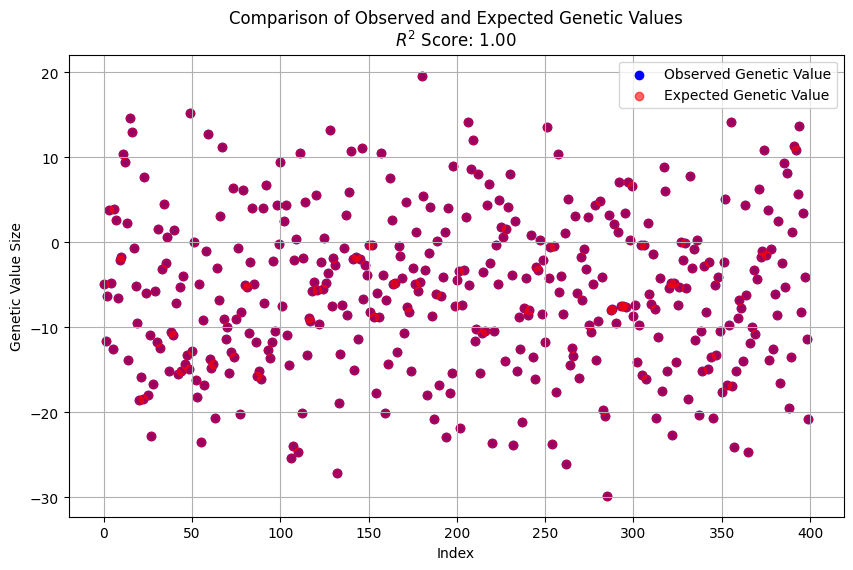

In [10]:
r2 = r2_score(ground_truth_genetic_value, sample_nodes_df['genetic_value']) #plotting the expected versus actual genetic values to verify the additive function

plt.figure(figsize=(10, 6))
plt.scatter(range(len(sample_nodes_df['genetic_value'])), sample_nodes_df['genetic_value'], color='blue', label='Observed Genetic Value')
plt.scatter(range(len(ground_truth_genetic_value)), ground_truth_genetic_value, color='red', alpha=0.6, label='Expected Genetic Value')

plt.title(f'Comparison of Observed and Expected Genetic Values\n$R^2$ Score: {r2:.2f}')
plt.xlabel('Index')
plt.ylabel('Genetic Value Size')
plt.legend()

plt.grid(True)

plt.show()

In [11]:
individual_genetic_value_df = samples_to_individuals(sample_nodes_df) #this combines the sample nodes into individual nodes

individual_genetic_value_df #half the number of individuals as compared to samples, due to diploid case

,individual_id,genetic_value,causal_mutation_id
0,0,-16.501664,0
1,1,-2.454348,0
2,2,-17.303803,0
3,3,6.641214,0
4,4,-8.710213,0
...,...,...,...
195,195,12.536488,0
196,196,16.549154,0
197,197,5.463626,0
198,198,-0.663779,0


In [12]:
normalized_genetic_value_df = normalize_genetic_values(individual_genetic_value_df) #sets mean to 0 and variance to 1 by default
normalized_genetic_value_df

,individual_id,genetic_value,causal_mutation_id
0,0,-0.375568,0
1,1,0.686386,0
2,2,-0.436209,0
3,3,1.373995,0
4,4,0.213453,0
...,...,...,...
195,195,1.819668,0
196,196,2.123019,0
197,197,1.284972,0
198,198,0.821750,0


In [13]:
new_mean = normalized_genetic_value_df['genetic_value'].mean()
new_std = normalized_genetic_value_df['genetic_value'].std()
new_var = normalized_genetic_value_df['genetic_value'].var()

print("The new mean of the genetic values is " + str(new_mean))
print("The new standard deviation of the genetic values is " + str(new_std))
print("The new variance of the genetic values is " + str(new_var))

The new mean of the genetic values is -8.43769498715119e-17
The new standard deviation of the genetic values is 1.0
The new variance of the genetic values is 1.0
